<a href="https://colab.research.google.com/github/JonathanJuradoS/Clustering_K-means/blob/main/kmeans_logistica_CASO_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis con K-Means – Kmeans Logistica

**Contexto:** Una empresa de delivery quiere optimizar rutas de reparto agrupando pedidos por ubicación geográfica para reducir tiempos y costos.

**Objetivo:** Usar K-Means para dividir las entregas diarias en zonas eficientes de distribución.

## Paso 1: Importar librerías necesarias
**Descripción:** Se importan las librerías que se utilizarán para manipular datos, crear el modelo K-Means, escalar variables, reducir dimensiones y graficar.

**Conclusión:** Con estas herramientas se puede realizar un análisis completo de clustering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

## Paso 2: Cargar el dataset
**Descripción:** Se carga el archivo CSV y se visualizan las primeras filas para conocer la estructura del dataset.

**Conclusión:** Se identifican las variables que serán utilizadas para el análisis de clustering.

In [2]:
df = pd.read_csv('logistica_entregas.csv')
df.head()

,pedido_id,latitud,longitud,distrito,peso_kg,tipo_producto
0,1a0375e2-e06c-4a01-be0b-243d06e55a3e,-12.160680,-77.172266,Jessicachester,11.63,Libros
1,2d1bb7bb-e73f-459e-8361-d6631301f406,-11.914193,-76.816298,North Samantha,2.75,Electrónica
2,fa335fb8-b559-426d-a3d1-ecbc7f43f5ab,-12.031529,-76.975837,Riosstad,1.80,Libros
3,8ecfbf88-b0f9-45bf-b974-a9bbad9b2121,-12.192398,-76.878306,South Howardport,1.75,Ropa
4,5decb67b-4839-48cb-a86d-860990aa8adc,-11.952974,-76.898902,North Andrew,17.16,Ropa


## Paso 3: Seleccionar variables numéricas y escalar los datos
**Descripción:** Se seleccionan las columnas numéricas y se estandarizan para que todas tengan igual peso en la distancia.

**Conclusión:** Se garantiza que ninguna variable domine el cálculo de distancias debido a su escala.

In [3]:
data = df.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

## Paso 4: Método del Codo para determinar el número óptimo de clusters
**Descripción:** Se calcula la inercia para distintos valores de K y se grafica para identificar el punto de quiebre ('codo').

**Conclusión:** El punto donde la curva deja de descender abruptamente sugiere el número óptimo de clusters.

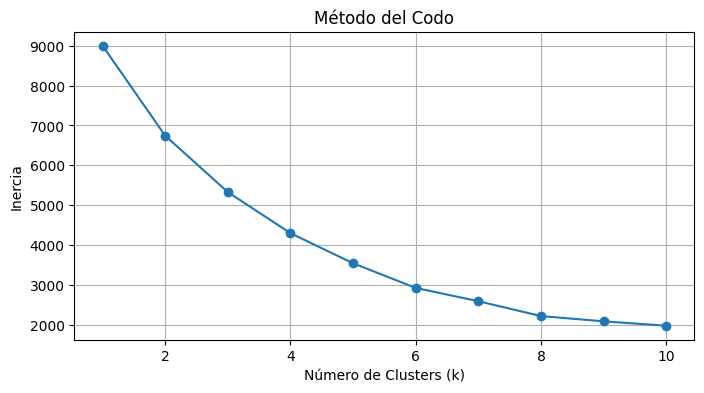

In [4]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

## Paso 5: Aplicar K-Means con K óptimo
**Descripción:** Se ejecuta el algoritmo K-Means con el número de clusters elegido.

**Conclusión:** Cada punto queda asignado a uno de los clusters creados.

In [5]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_scaled)
df['cluster'] = kmeans.labels_

## Paso 6: Visualización de clusters (2D con Pairplot)
**Descripción:** Se visualizan las relaciones entre variables coloreando por cluster.

**Conclusión:** Se observa si los clusters tienen separación visual clara en 2D.

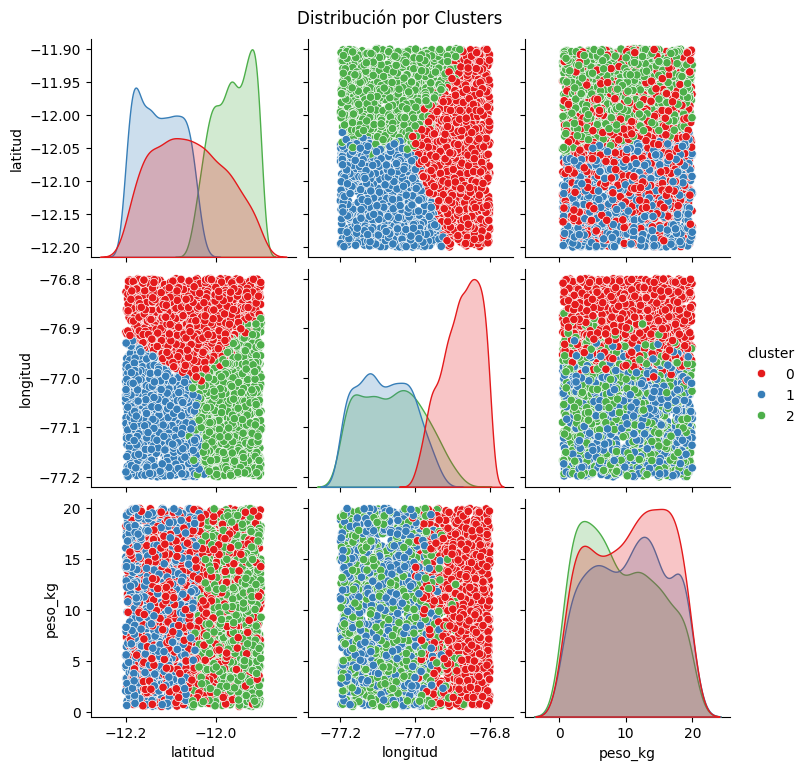

In [6]:
sns.pairplot(df, hue='cluster', palette='Set1')
plt.suptitle('Distribución por Clusters', y=1.02)
plt.show()

## Paso 7: Silhouette Score y gráfico de silueta
**Descripción:** Se calcula el coeficiente de silueta global y por punto para evaluar la calidad de los clusters.

**Conclusión:** Valores cercanos a 1 indican buena asignación. Se visualiza la cohesión interna de cada grupo.

Silhouette Score: 0.2431


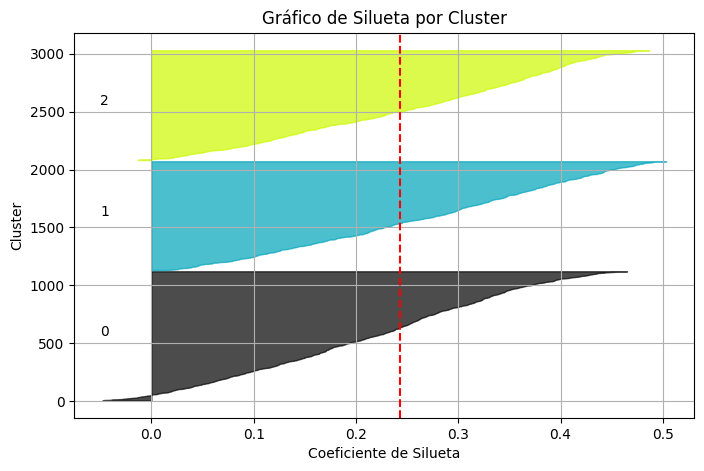

In [7]:
score = silhouette_score(data_scaled, kmeans.labels_)
print(f"Silhouette Score: {score:.4f}")

sample_silhouette_values = silhouette_samples(data_scaled, kmeans.labels_)
y_lower = 10
fig, ax1 = plt.subplots(figsize=(8, 5))

for i in range(k):
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.nipy_spectral(float(i) / k)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_title('Gráfico de Silueta por Cluster')
ax1.set_xlabel('Coeficiente de Silueta')
ax1.set_ylabel('Cluster')
ax1.axvline(x=score, color="red", linestyle="--")
plt.grid(True)
plt.show()

📐 Silhouette Score = 0.2431
📌 ¿Qué mide?
El Silhouette Score evalúa la calidad del agrupamiento midiendo la cohesión (qué tan cerca están los puntos dentro de su cluster) y la separación (qué tan lejos están de otros clusters).

🎯 Interpretación de tu valor:
Tu Silhouette Score de 0.2431 se encuentra en el límite inferior del rango aceptable.

Esto sugiere que:

Los clusters existen, pero no son claramente distintos.

Hay solapamiento o ambigüedad en algunos puntos.

Puede haber uno o más clusters demasiado cercanos entre sí.

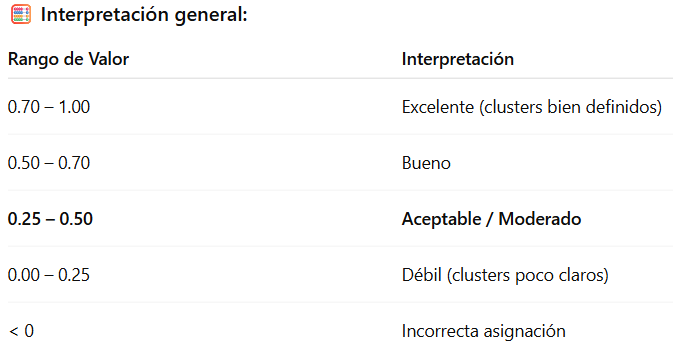

## Paso 8: Métricas Davies-Bouldin y Calinski-Harabasz
**Descripción:** Métricas complementarias que evalúan la compacidad y separación entre clusters.

**Conclusión:** Se usan para confirmar la calidad del agrupamiento.

In [8]:
db_score = davies_bouldin_score(data_scaled, kmeans.labels_)
ch_score = calinski_harabasz_score(data_scaled, kmeans.labels_)
print(f"Davies-Bouldin Score: {db_score:.4f}")
print(f"Calinski-Harabasz Score: {ch_score:.2f}")

Davies-Bouldin Score: 1.3197
Calinski-Harabasz Score: 1031.88


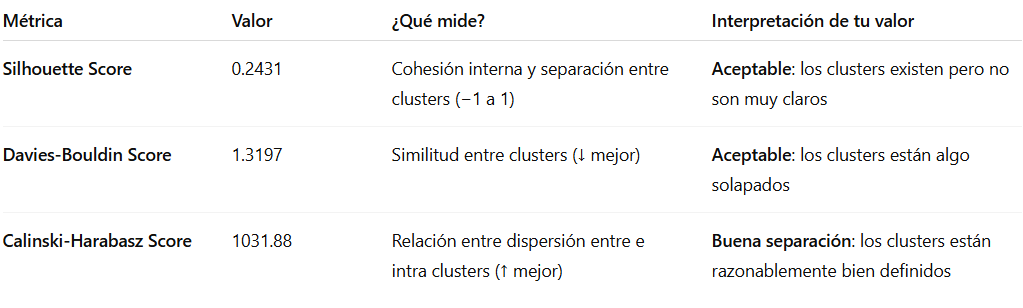

## Paso 9: Visualización 2D con PCA
**Descripción:** Se reduce la dimensionalidad a 2 componentes principales para graficar los clusters y sus centroides.

**Conclusión:** Una separación clara refuerza la efectividad del modelo.

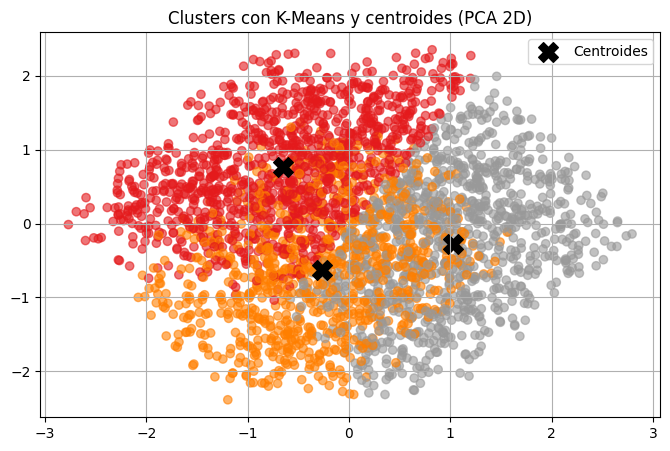

In [9]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)
centroids_2d = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, cmap='Set1', alpha=0.6)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], marker='X', s=200, c='black', label='Centroides')
plt.title("Clusters con K-Means y centroides (PCA 2D)")
plt.legend()
plt.grid(True)
plt.show()

## Paso 10: Visualización 3D
**Descripción:** Se muestra una representación tridimensional de los clusters si existen al menos 3 variables numéricas.

**Conclusión:** Permite observar patrones más complejos entre los grupos.

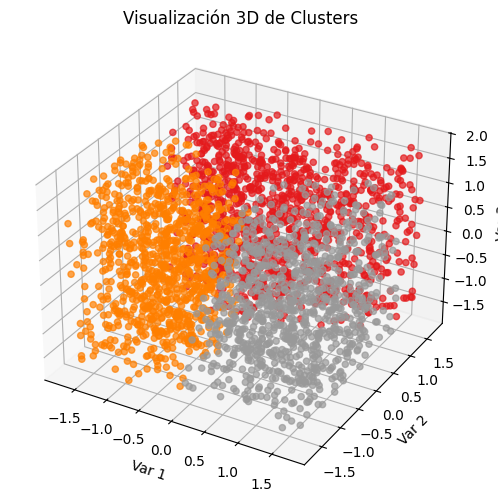

In [10]:
if data_scaled.shape[1] >= 3:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2],
                         c=kmeans.labels_, cmap='Set1', alpha=0.7)
    ax.set_title("Visualización 3D de Clusters")
    ax.set_xlabel("Var 1")
    ax.set_ylabel("Var 2")
    ax.set_zlabel("Var 3")
    plt.show()
else:
    print("No hay suficientes variables numéricas para graficar en 3D.")

## ✅ Conclusiones Finales del Análisis con K-Means

- K-Means permite segmentar los datos de manera efectiva sin necesidad de etiquetas.
- Las métricas (Inercia, Silhouette, Davies-Bouldin, Calinski-Harabasz) ayudan a validar el número y calidad de clusters.
- Las visualizaciones 2D y 3D permiten una interpretación intuitiva de los grupos formados.
- Este tipo de análisis es aplicable en marketing, ciberseguridad, logística, entre otros.